# Attrition Case Study

## Business Problem:

HR departments would like to minimize staff attrition, due to its high costs.

Use classification model to predict if an employee is likely to quit, so that HR could intervene and maybe prevent attrition.

Goal: Modest improvement compared to random allocation of probability of attrition



### Import Packages:

In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV
from pprint import pprint
import time
from sklearn.metrics import auc, plot_roc_curve,roc_auc_score, precision_recall_fscore_support, classification_report, confusion_matrix

## Data Import

In [4]:
rawdata=[]
rawdata = pd.read_csv("employee-attrition.csv")

## Data Visualization

In [48]:
rawdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [49]:
rawdata.iloc[0]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [25]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

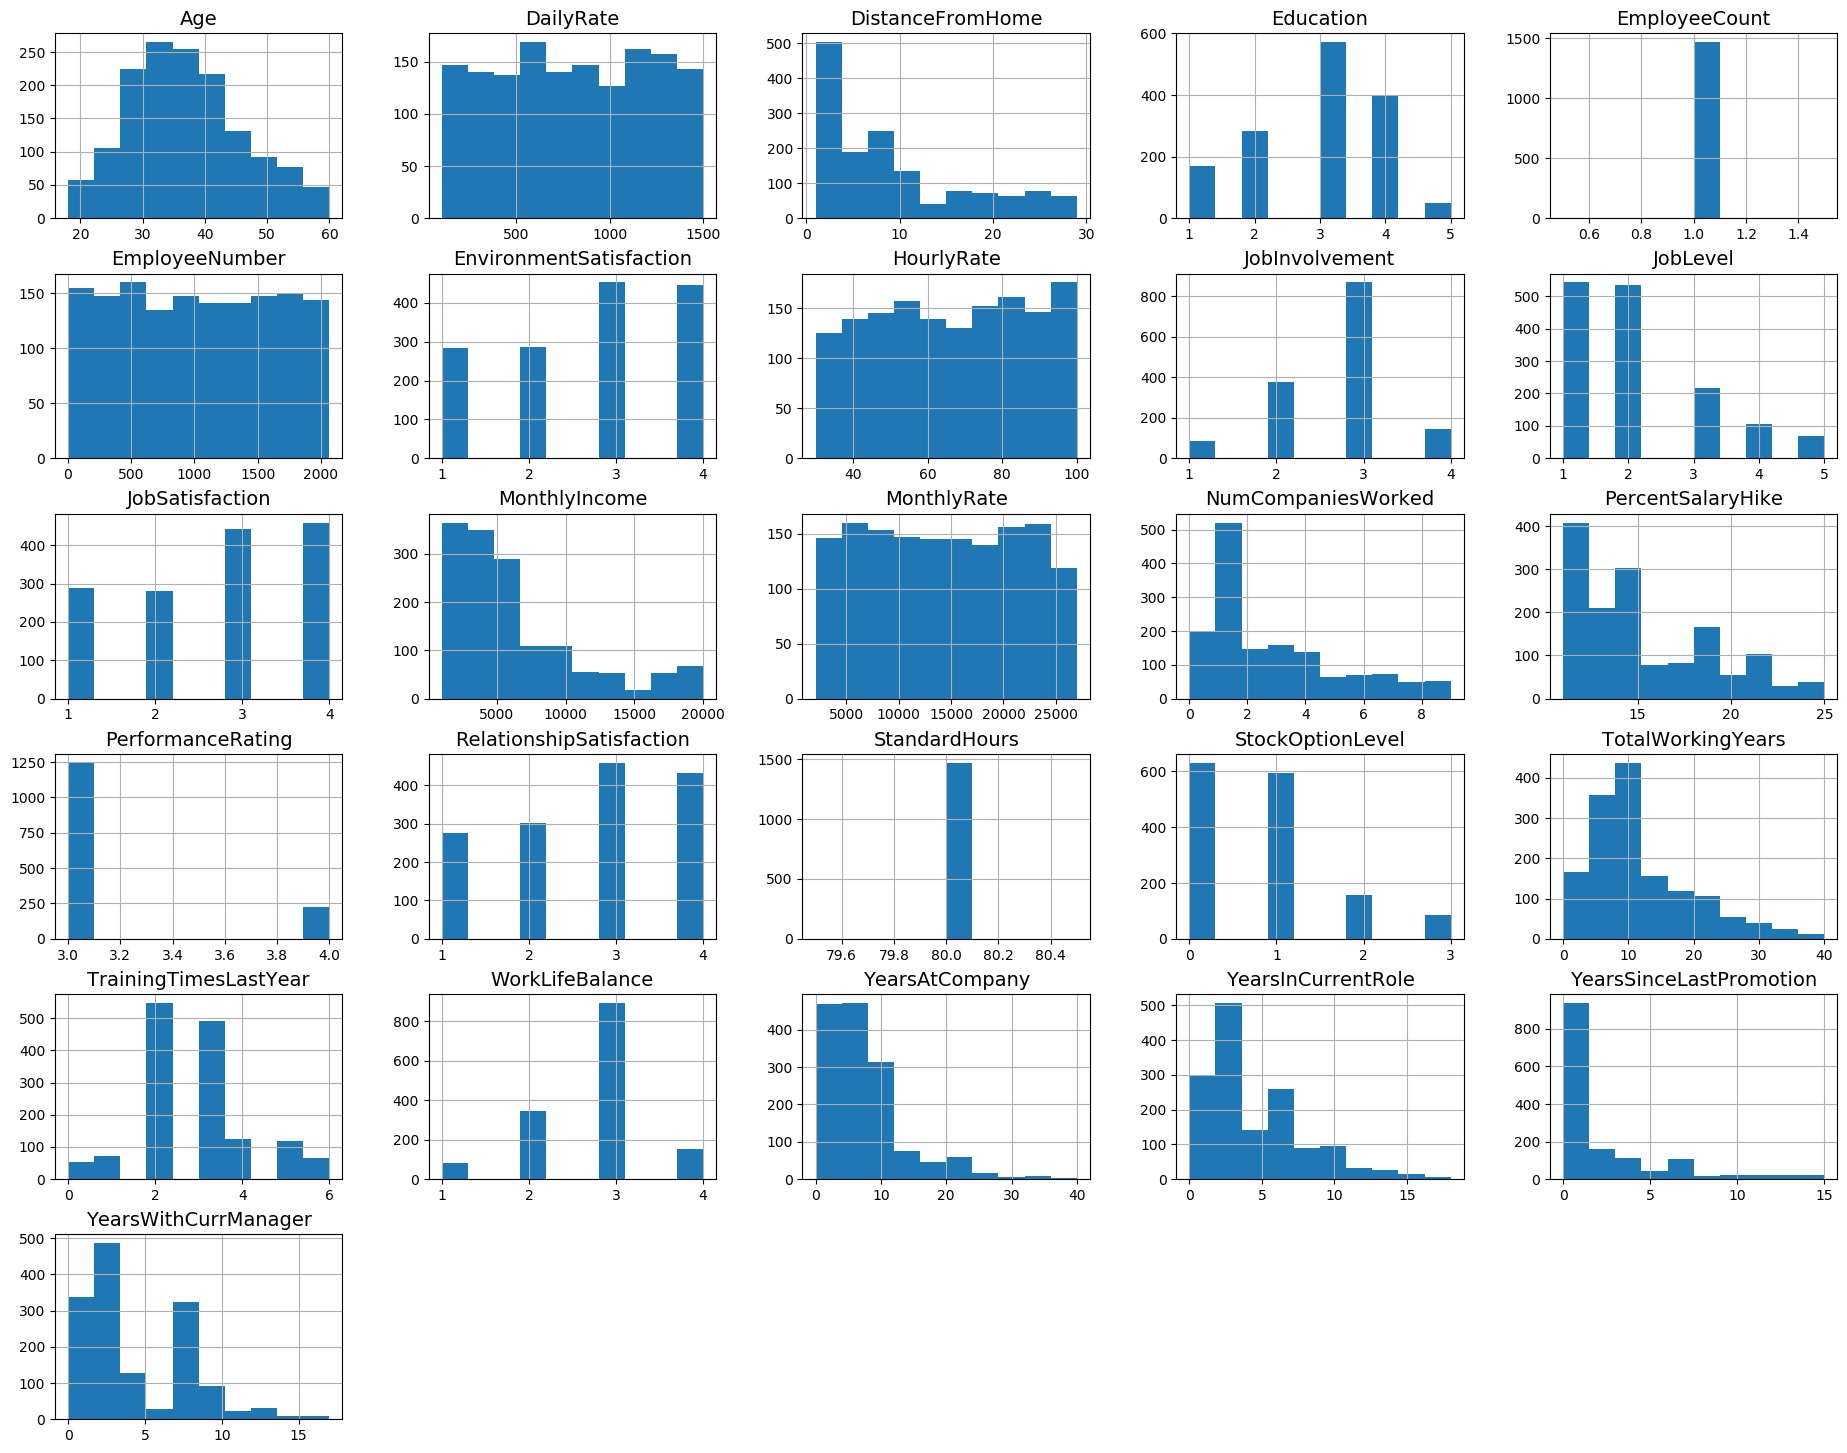

In [20]:
plt.rc('axes', titlesize=14)     # fontsize of the axes title
rawdata.hist(bins=10,figsize=(23,18),xlabelsize=10,ylabelsize=10)
plt.show()

### Handling Categorical Features

Categorical Variables:
- BusinessTravel
- Department
- EducationField
- JobRole
- MaritalStatus
- Education
- EnvironmentSatisfaction
- JobLevelJobInvolvement
- JobSatisfaction
- RelationshipSatisfaction
- StockOptionLevel
- WorkLifeBalance


Binary Variables:
- Gender
- OverTime
- PerformanceRating

We take categorical variables as one hot encoding vectors when facing the problem with LogisticRegression. The binary variables are already one hot encodings, only PerformanceRating has values 3 and 4, but that does not make a difference as we standardize all variables within Logistic Regression anyway. (and we need to change all string categories to numeric categories)

In the case of random forest, dummy variables (one hot) hence only one possible way to split and this induces sparsity in the random forest model -> change string cateogries to numeric categories.

In [13]:
rawdata_o=rawdata.copy(deep='all')

In [16]:
pd.Categorical(rawdata['EmployeeNumber'])

[1, 2, 4, 5, 7, ..., 2061, 2062, 2064, 2065, 2068]
Length: 1470
Categories (1470, int64): [1, 2, 4, 5, ..., 2062, 2064, 2065, 2068]

In [52]:
catvar=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
bivar=['Gender','OverTime','Attrition']
catvarnum=['Education','EnvironmentSatisfaction','JobLevel','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

for col in catvar:
    #categorical numbers:
    rawdata_o[col]=pd.Categorical(rawdata[col]).codes
    
    #one hot encoding
    rawdata_o[col]=pd.Categorical(rawdata_o[col])
    dummies=pd.get_dummies(rawdata_o[col],prefix='category' +col,drop_first=True)
    rawdata_o=pd.concat([rawdata_o,dummies],axis=1)
    rawdata_o=rawdata_o.drop(col,axis=1)


for col in catvarnum:
    #one hot encoding
    rawdata_o[col]=pd.Categorical(rawdata_o[col])
    dummies=pd.get_dummies(rawdata_o[col],prefix='category '+col,drop_first=True)
    rawdata_o=pd.concat([rawdata_o,dummies],axis=1)
    rawdata_o=rawdata_o.drop(col,axis=1)    
    
for col in bivar:
    rawdata[col]=pd.Categorical(rawdata[col]).codes
    rawdata_o[col]=pd.Categorical(rawdata_o[col]).codes

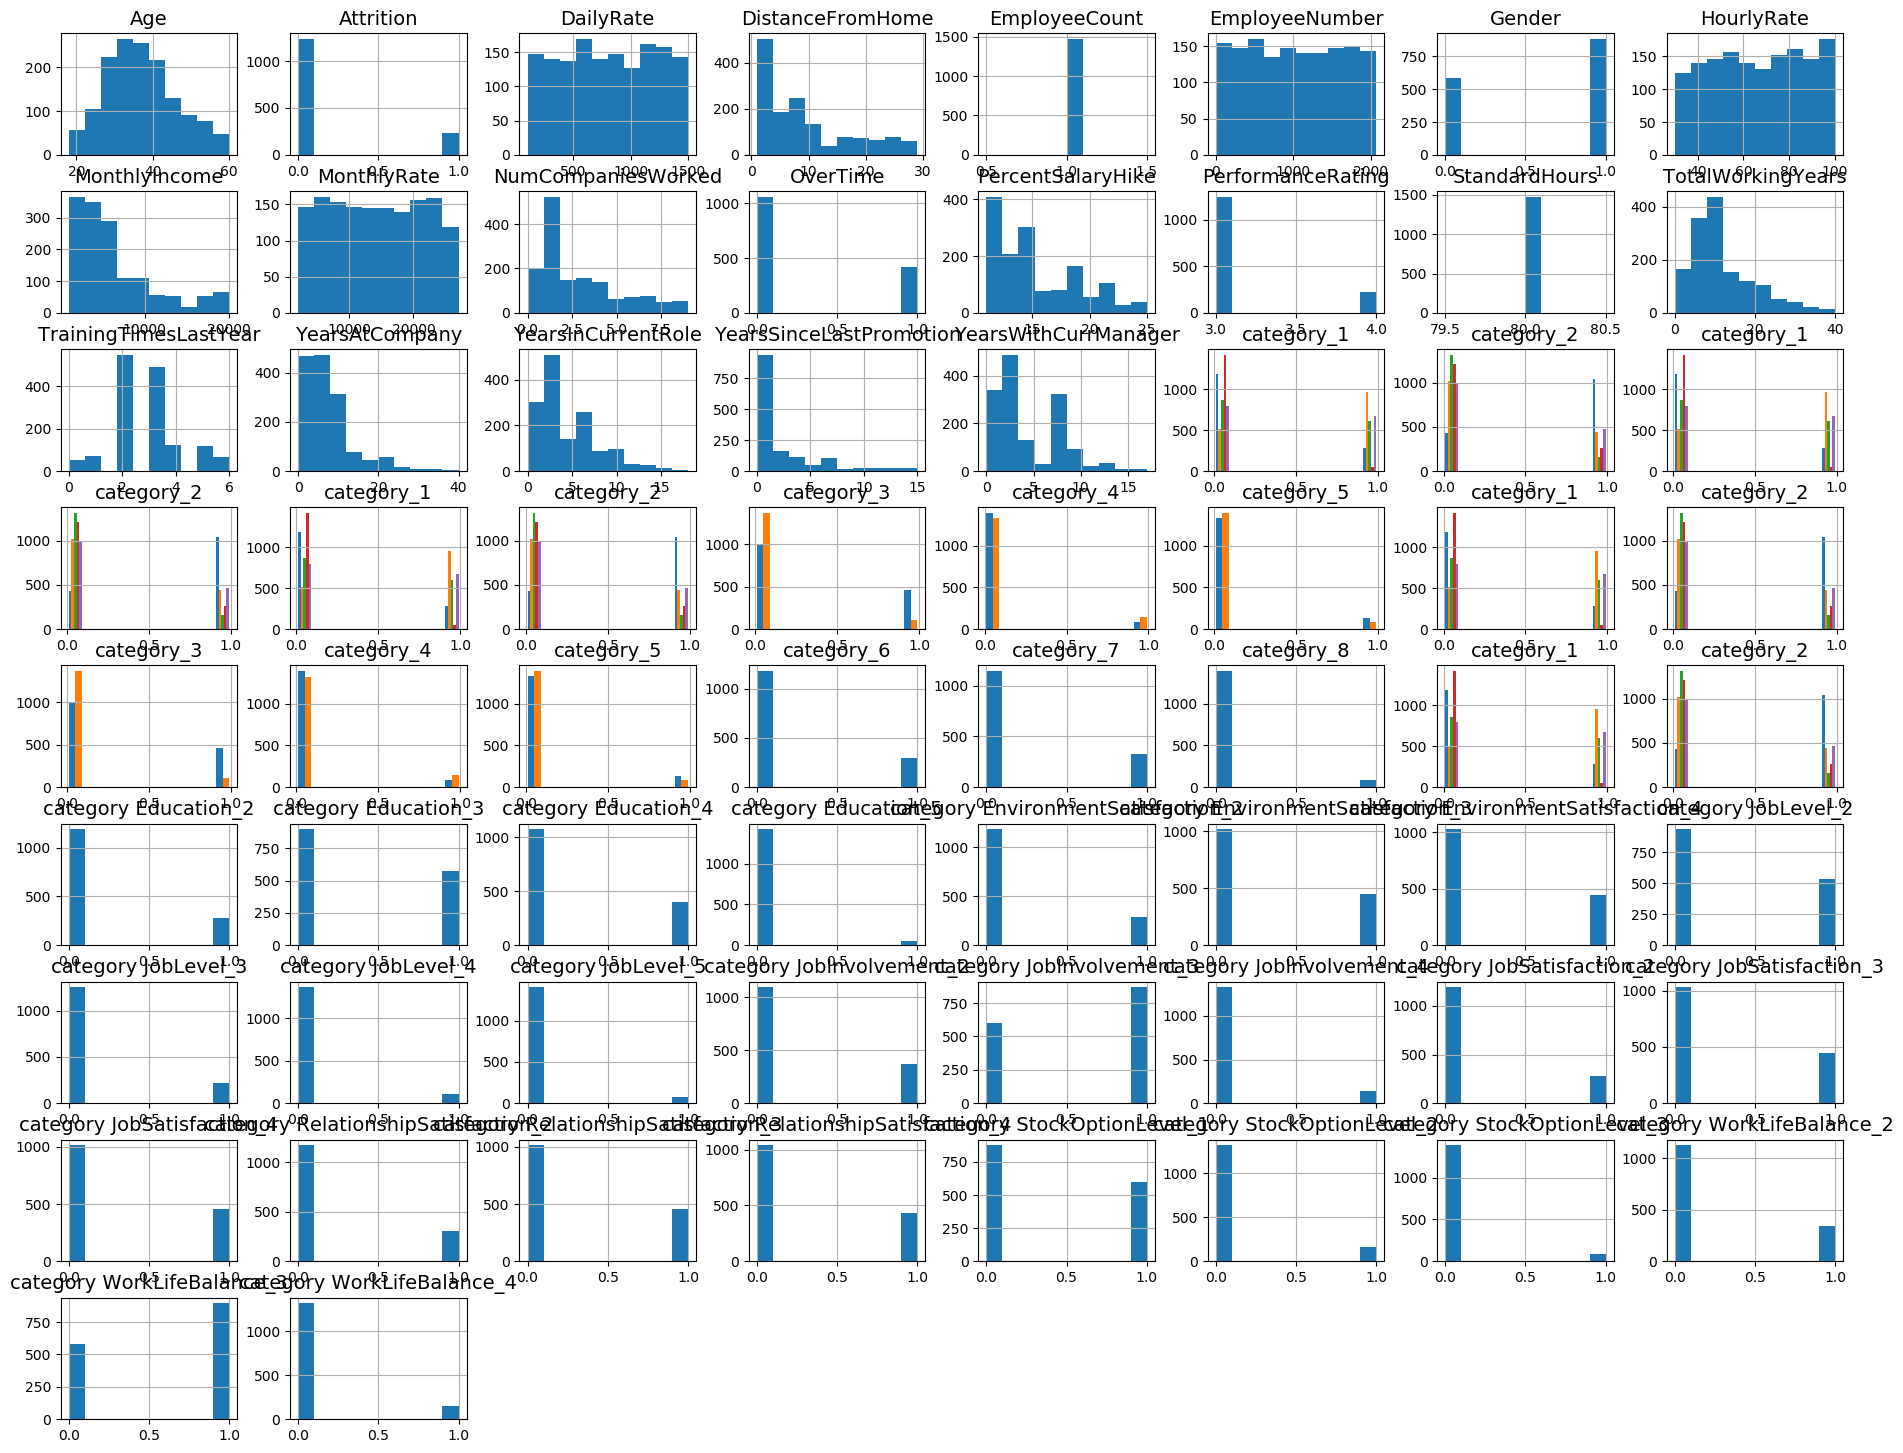

In [53]:
plt.rc('axes', titlesize=14)     # fontsize of the axes title
rawdata_o.hist(bins=10,figsize=(23,18),xlabelsize=10,ylabelsize=10)
plt.show()

#### Dropping unnecessary variables:

Variables 'EmployeeCount','StandardHours' and 'Over18' have the same value for all data points, hence they are useless for further analysis.

In [54]:
rawdata=rawdata.drop('EmployeeCount',axis=1)
rawdata=rawdata.drop('StandardHours',axis=1)
rawdata=rawdata.drop('Over18',axis=1)
rawdata_o=rawdata_o.drop('EmployeeCount',axis=1)
rawdata_o=rawdata_o.drop('StandardHours',axis=1)
rawdata_o=rawdata_o.drop('Over18',axis=1)

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
num_variables =['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TotalWorkingYears','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
nonnum_variables = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Education','EnvironmentSatisfaction','JobLevel','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Gender','OverTime']
del_variables = ['EmployeeCount','EmployeeNumber','StandardHours','Over18']

preprocess_data = ColumnTransformer([
    ('std_scaler', StandardScaler(),num_variables),
    ('onehot_encoder', OneHotEncoder(drop='first'),nonnum_variables),
    ('del_cols', 'drop',del_variables)
])


In [4]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score, GridSearchCV

In [8]:
def loadpreprocess_dataset(path):
    data=pd.read_csv(path)
    preprocessed_data = preprocess_data.fit_transform(data)
    return [preprocessed_data,data['Attrition']]

In [9]:
[x,y]=loadpreprocess_dataset('employee-attrition.csv')

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
rf_grid = {
 'n_estimators': [ 10,100],
 'max_depth': [1, 5],
'criterion': ['gini', 'entropy'],
 'bootstrap': [True, False],
}

In [15]:
cv = 5
RF = RandomForestClassifier(class_weight='balanced')
[X,Y]= loadpreprocess_dataset('employee-attrition.csv')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

grid_rf_search = GridSearchCV(RF, param_grid = rf_grid, cv = 5, n_jobs = 8, verbose = 2)
grid_rf_search.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done  65 out of  80 | elapsed:    6.0s remaining:    1.4s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    7.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [37]:
print(grid_rf_search.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}


In [34]:
print(type(True))

<class 'bool'>


In [38]:
RF2 = RandomForestClassifier(class_weight='balanced', bootstrap=bool(grid_rf_search.best_params_['bootstrap']), criterion=grid_rf_search.best_params_['criterion'], max_depth=grid_rf_search.best_params_['max_depth'] , n_estimators=grid_rf_search.best_params_['n_estimators'] )

In [43]:
RF2.fit(X_train,Y_train)
print(RF2.score(X_train,Y_train))
print(RF2.score(X_test,Y_test))


0.8954081632653061
0.8367346938775511


In [71]:
RF = RandomForestClassifier()
[X,Y]= loadpreprocess_dataset('employee-attrition.csv')

crossval_scores = cross_val_score(RF,X,Y,cv=5)

print(crossval_scores)

# param_grid = {
#                  'n_estimators': [5, 10, 15, 20],
#                  'max_depth': [2, 5, 7, 9]
#              }

# grid_rf = GridSearchCV(RF, param_grid, cv=5)
# grid_rf.fit(X,Y)

[1. 1. 1. 1. 1.]


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [53]:
print(

[[ 0.4463504   0.74252653 -1.01090934 ...  0.          1.
   1.        ]
 [ 1.32236521 -1.2977746  -0.14714972 ...  1.          0.
   0.        ]
 [ 0.008343    1.41436324 -0.88751511 ...  1.          1.
   1.        ]
 ...
 [-1.08667552 -1.60518328 -0.64072665 ...  1.          1.
   0.        ]
 [ 1.32236521  0.54667746 -0.88751511 ...  1.          0.
   0.        ]
 [-0.32016256 -0.43256792 -0.14714972 ...  1.          0.
   0.        ]] 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object


(1470,)


### Looking for Correlations

Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables.

We use the one hot encodings, as the pearson correlation coefficient would not make any sense on categorical variables.

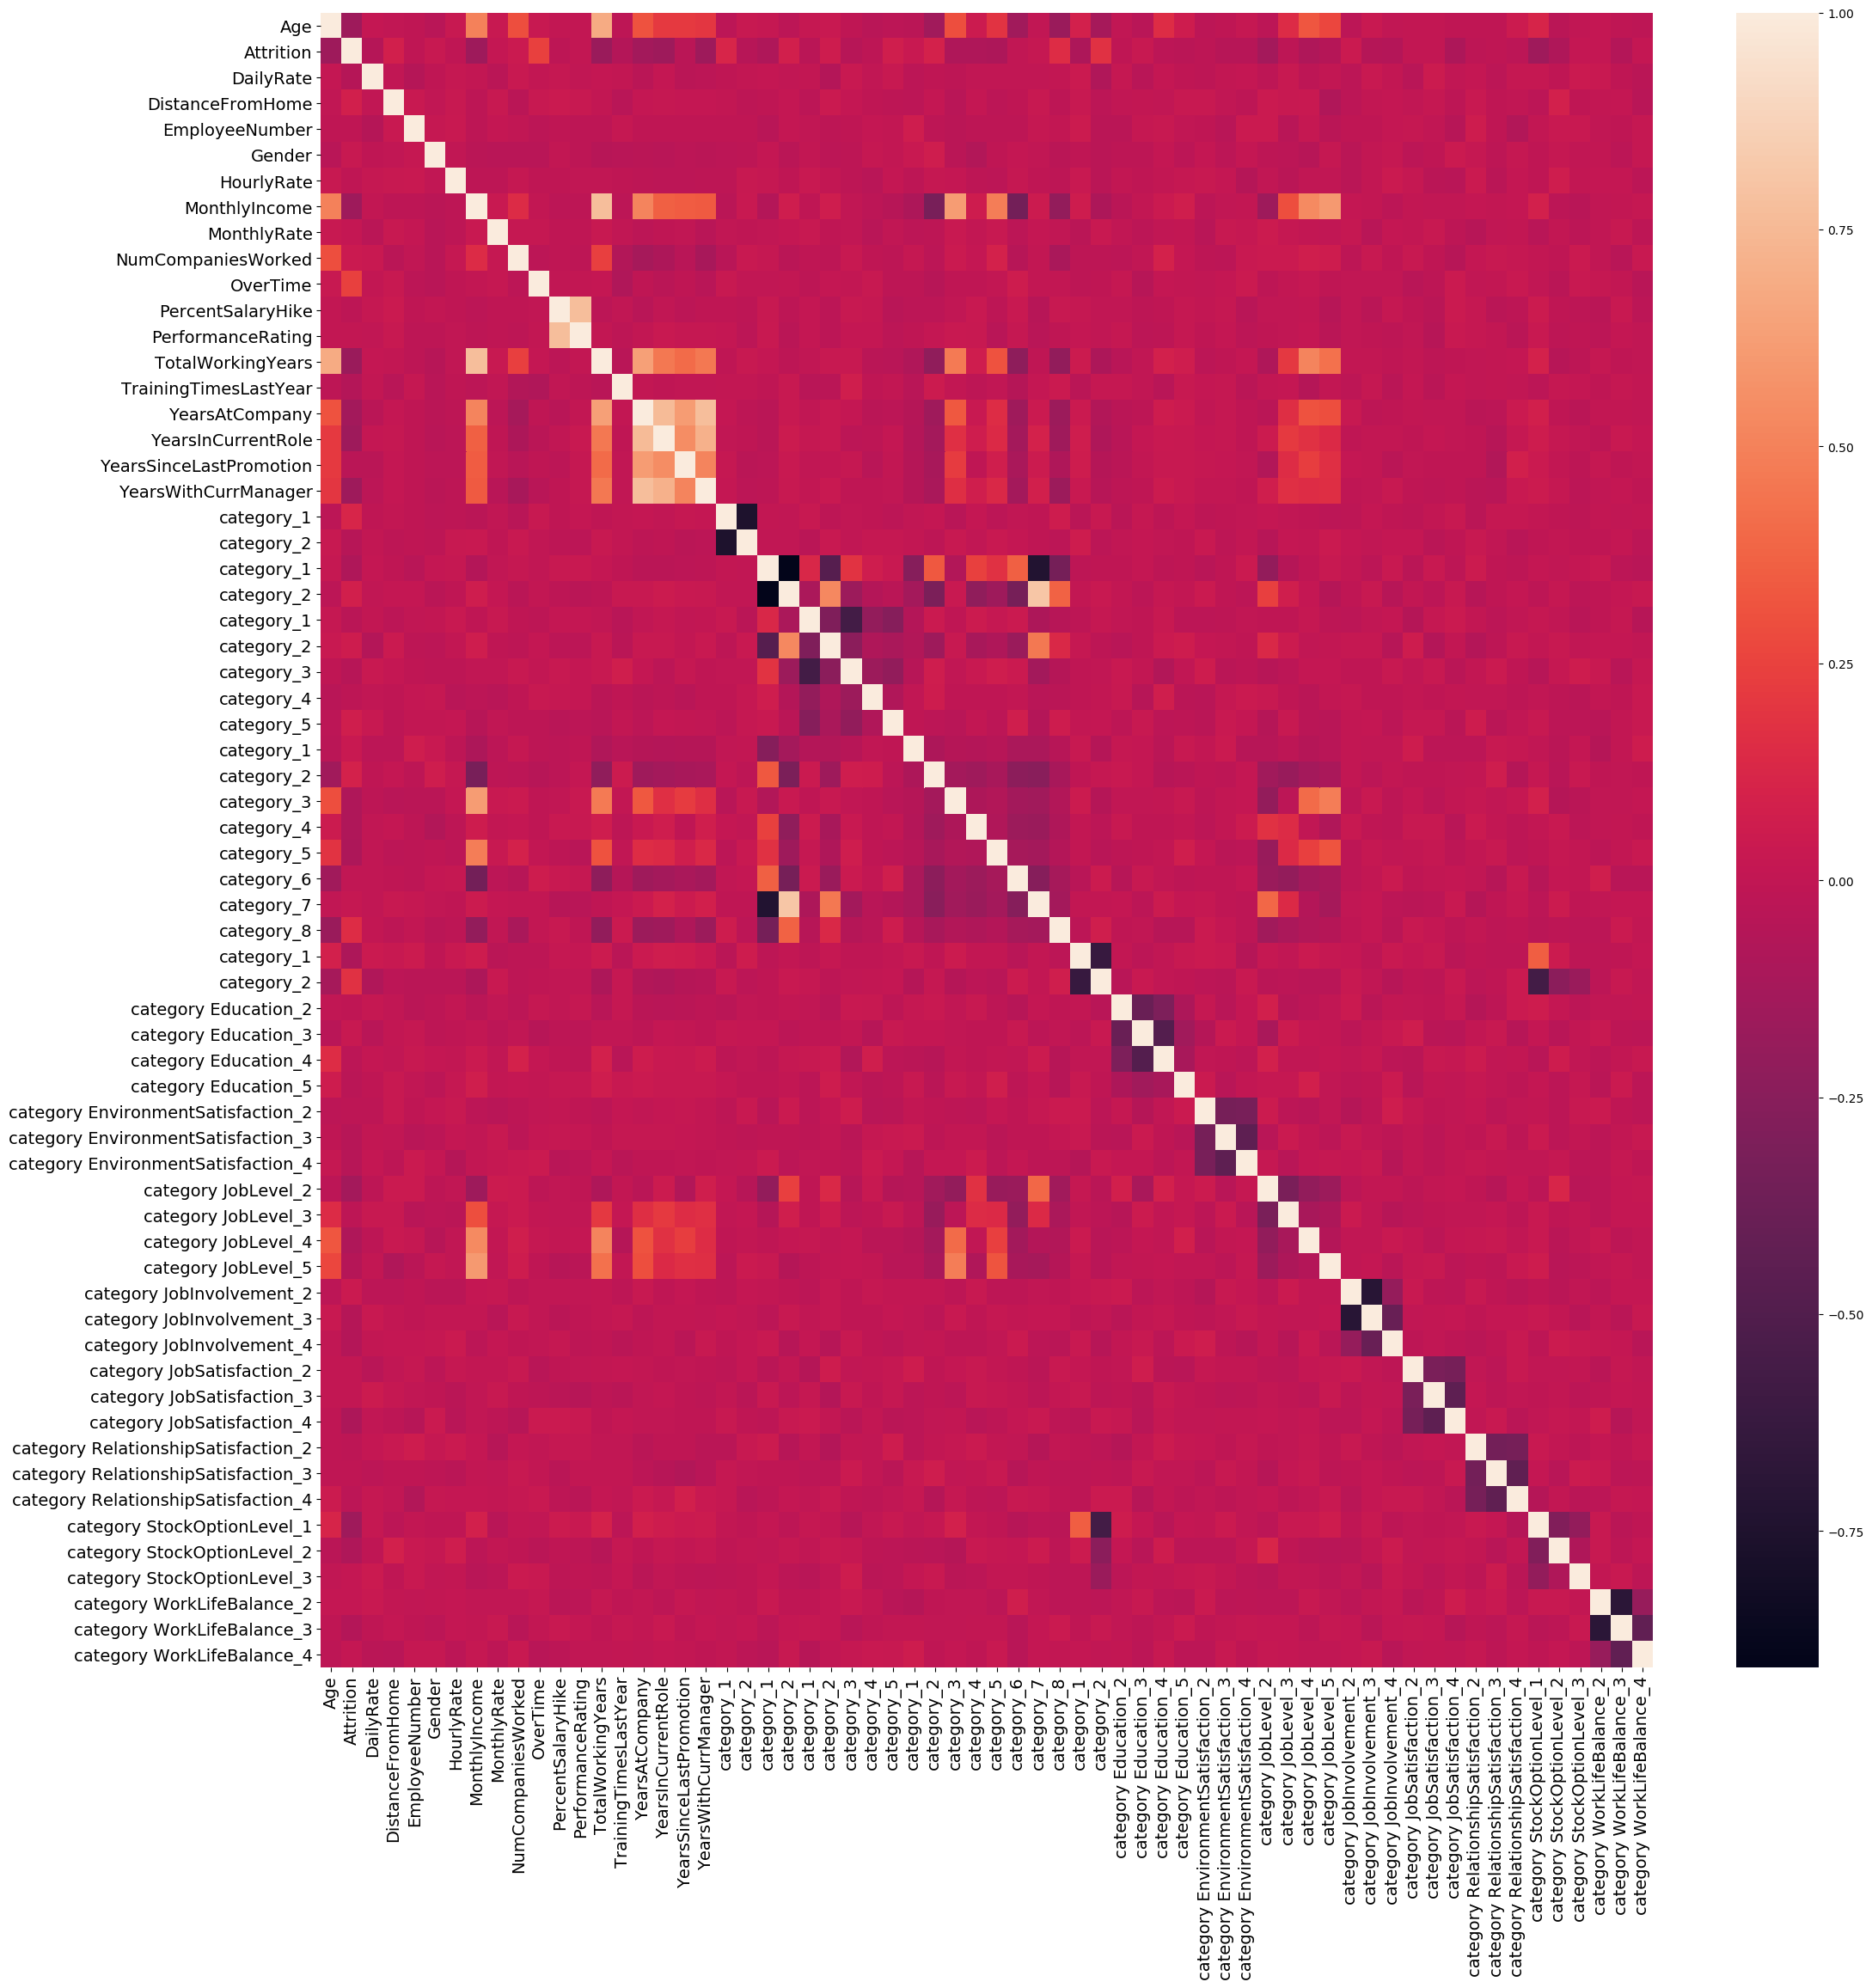

In [55]:
corr=rawdata_o.corr()
plt.figure(figsize=(25,25))
sb.heatmap(corr)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

#### Attrition Correlation ordered by absolute values:

In [15]:
print(corr['Attrition'].iloc[np.abs(corr['Attrition'].values).argsort()][:5])
print()
highcor=corr['Attrition'].iloc[np.abs(corr['Attrition'].values).argsort()][-6:-1]
print(highcor)

category_Research Scientist   -0.000360
PerformanceRating              0.002889
category JobSatisfaction_2     0.004038
HourlyRate                    -0.006846
category Education_2          -0.006884
Name: Attrition, dtype: float64

MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
TotalWorkingYears    -0.171063
category_Single       0.175419
OverTime              0.246118
Name: Attrition, dtype: float64


Histogram Plot of these 5 variables having the highest correlation with Attrition:

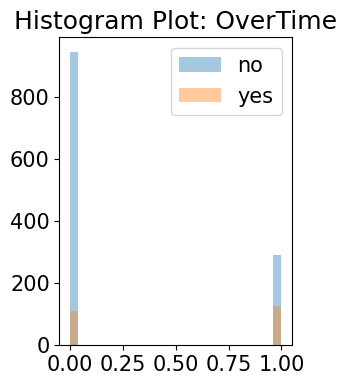

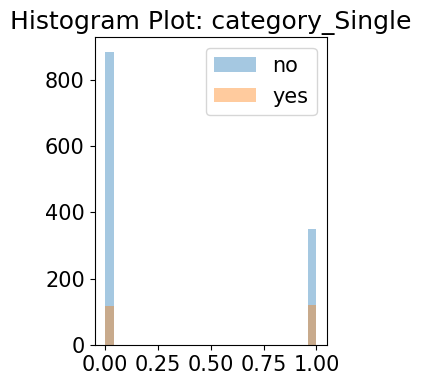

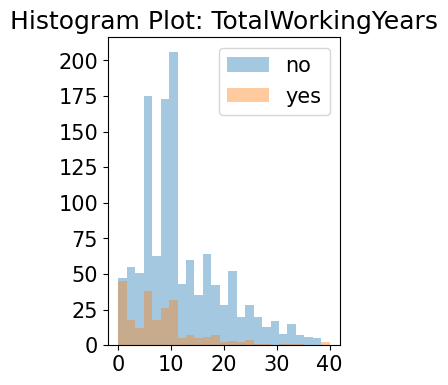

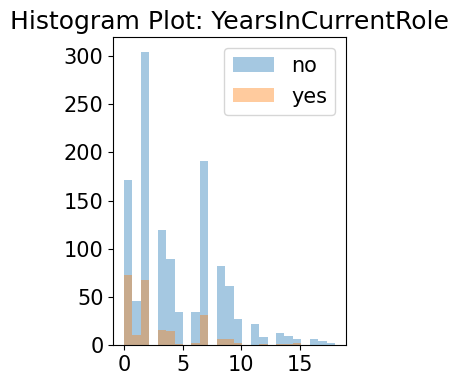

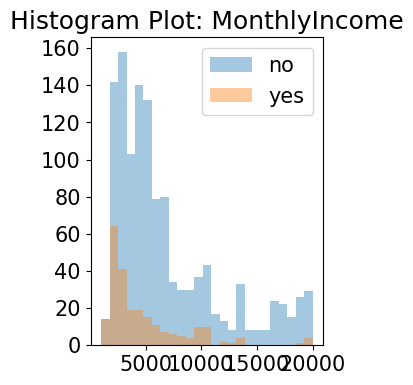

In [16]:
for i in range(1,6):
    currclass=highcor.index[-i]
    rawdata_wide=rawdata_o.pivot(columns='Attrition', values=currclass)
    rawdata_wide.plot.hist(bins=25, figsize=(3,4), alpha=0.4)
    plt.title('Histogram Plot: ' + currclass,size = 18)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(size = 15)
    plt.legend(["no","yes"], fontsize=15)
    plt.xticks(size=15)

### Imbalanced Data

In [17]:
print('No Attrition: ' + str((1-np.sum(rawdata['Attrition'])/len(rawdata))*100) + '%')

No Attrition: 83.87755102040816%


The problem of imbalanced data is the so called "Accuracy Paradox":

It is the case where your accuracy measures tells the story that you have excellent accuracy (such as 83%), but the accuracy is only reflecting the underlying class distribution.

Thats a ratio of 1:5. Slight imbalances would not be such a big problem, but in such a situation have to deal with the problem.

Several possible ways to do so:
- get more data
- resample data (over/undersample)
- generate synthetic sample (f.e. SMOTE - Synthetic Minority Over-sampling Technique)
- use appropriate perfomance metric (confusion matrix, precision, recall, F1, ROC/AUC)
- balanced weights in models

To tackle this problem we will use ROC/AUC as our decision metric. The actual reason why we use it is because it does not depend on the class distribution. So for imbalanced data sets its perfect.

On top of that I will use balanced weights within the models to tackle that problem -> adjust weights inversly proportional to class frequencies.

(I did SMOTE as well but computational time exploded for the random forest part, for Log Reg its bad due to the independent observation assumption)

## Model

#### Random Forests

Random forests is an ensemble learning consisting of several decision trees. RFs introduce extra randomness when growing resulting in a reduction of variance. Random forests compute majority votes over all trees. Decision Tree is a top down "greedy" approach - which takes simpler solutions rather than complex ones. 

Pros:

- no multicollinearity problelm
- can work with categorical variables without any problem.
- more flexible to tackle complex problems
- work well with outliers and missing values

Cons:

- RF is usually considered as a black-box algorithm, as gaining insight on a RF prediction rule is hard especially with a large number of trees. There is a way of getting variable importance measures, but not how this measures affect the output.
- higher computational costs than using logisitc regression, especially during training. (could use extremly randomized trees to make it faster)

## Model Details

- StratifiedKFold - producing folds that contain a representative ratio of each class.

- Metric: Receiver Operating Characteristic (ROC), Area under the curve (AUC), precision, recall, f1-score.

- Another preprocessing step, changing the data, therefore has to be wihtin the cross-val process:

Standardize Data: use the StandardScaler (x'=(x-mu)/sdev => x'~N(0,1)). Outliers will not be affected by standardization, but still have an effect on the process.

### ROC Analysis

ROC (receiver operating characteristic)

plot recall (TPR) against FPR (1-specificity,1-TNR)

Comparing these ROC curves with AUC, chance having 0.5

## Random Forest Classifier

No multicollinearity problem, due to inherent randomness of random forest.

### Feature Selection - Mean decrease impurity

Feature Selection using randomforestregressor. Every node in the decision tree is a condition on a single feature. When training a tree it can be computed how much each feature decreases the weighted impurity (in our case variance) in a tree. For a forest the impurity decrease from each feature can be averaged.

We will now perform randomforestregressor within stratifiedKFoldCV. After that we average the feature importances over all 10 CVs.

In [24]:
rf = RandomForestClassifier(class_weight='balanced')

rf_pipel=Pipeline([('standardize', StandardScaler()), ('rf',rf)])
cv10 = StratifiedKFold(n_splits=10,shuffle=True)

roc_auc=[]
feat_imp=np.zeros(31)

for train_ind, test_ind in cv10.split(X,y):
    rf_pipel.fit(X.loc[train_ind],y.loc[train_ind])
    y_hat=rf_pipel.predict(X.loc[test_ind])
    roc_auc.append(roc_auc_score(y.loc[test],y_hat))
    feat_imp=feat_imp+rf_pipel.steps[1][1].feature_importances_

feat_imp=feat_imp/10


ValueError: operands could not be broadcast together with shapes (31,) (57,) 

In [25]:
print ("Features sorted by their score:")
print()
for i in sorted(zip(map(lambda x: round(x, 4), feat_imp), X.columns), 
             reverse=True):
    print(i)

Features sorted by their score:

(0.0, 'category_Travel_Rarely')
(0.0, 'category_Travel_Frequently')
(0.0, 'category_Technical Degree')
(0.0, 'category_Single')
(0.0, 'category_Sales Representative')
(0.0, 'category_Sales')
(0.0, 'category_Research Scientist')
(0.0, 'category_Research Director')
(0.0, 'category_Research & Development')
(0.0, 'category_Other')
(0.0, 'category_Medical')
(0.0, 'category_Married')
(0.0, 'category_Marketing')
(0.0, 'category_Manufacturing Director')
(0.0, 'category_Life Sciences')
(0.0, 'category_Laboratory Technician')
(0.0, 'category_Human Resources')
(0.0, 'YearsWithCurrManager')
(0.0, 'YearsSinceLastPromotion')
(0.0, 'TrainingTimesLastYear')
(0.0, 'PercentSalaryHike')
(0.0, 'OverTime')
(0.0, 'NumCompaniesWorked')
(0.0, 'MonthlyRate')
(0.0, 'MonthlyIncome')
(0.0, 'HourlyRate')
(0.0, 'Gender')
(0.0, 'EmployeeNumber')
(0.0, 'DistanceFromHome')
(0.0, 'DailyRate')
(0.0, 'Age')


Having this feature importance ranking and the corresponding total variance effect, we now use only those variables to be able to represent 95% of the total variance:

In [461]:
X=X.drop('PerformanceRating',axis=1)
X=X.drop('Gender',axis=1)
X=X.drop('Department',axis=1)
X=X.drop('BusinessTravel',axis=1)

Remaining Total variance: ~96%

## Hyperparameter Tuning (Random Forest Case)

Narrow down wide range of values for each hyperparameter using Random Search Cross Validation and for the following hyperparameters:

- n_estimators ... number of trees
- max_features ... max number of features considered for splitting a node
- max_depth ... max number of levels in each decision tree
- bootstrap ... method for sampling data point (with or without replacement)
- min_samples_leaf ... min. number of samples required at each leaf node
- min_samples_split ... min. number of samples required to split a node


In [423]:
n_estimators = [int(x) for x in np.linspace(50,2000,40)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,150,15)]
bootstrap = [True, False]
min_samples_leaf = [1,2,3,4,5]
min_samples_split = [2,4,6,8,10]


random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap
               }

parameter_combinations=15*40*2*2*5*5
print('Possible parameter combinations: ' + np.str(parameter_combinations))

print(random_grid)

Possible parameter combinations: 60000
{'rf__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000], 'rf__max_features': ['auto', 'sqrt'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150], 'rf__min_samples_split': [2, 4, 6, 8, 10], 'rf__min_samples_leaf': [1, 2, 3, 4, 5], 'rf__bootstrap': [True, False]}


### Random Grid Search:

The shown grid has 60.000 different combinations

Bergstra and Bengio showed in “Random search for hyperparameter optimization” showed, that allthough it doesn’t search over all the grid points, in surprisingly many instances, random search performs about as well as grid search. Trying 460 random points sampled from the grid seems to be good enough. Probabilistic explanation:

Imagine a 1\% interval around the true maximum. Sampling points, each random draw has a 1% chance to be in that interval. If we draw n points independently and if we want at least a .99 probability of sucess, following:

$1-(1-0.01)^n > 0.99$

Therefore we need $n>458.21$ draws/iterations.
(more iterations -> wider search space covered, trade off runtime vs quality)

Additionaly, I used 10 fold cross validation as before.



In [420]:
rf = RandomForestClassifier(class_weight='balanced')

pipel=Pipeline([('standardize', StandardScaler()), ('rf',rf)])
cv10 = StratifiedKFold(n_splits=10,shuffle=True)

rf_random = RandomizedSearchCV(pipel,
                               param_distributions=random_grid,
                               n_iter=460,
                               cv=cv10, 
                               random_state=1,
                               n_jobs=-1,
                               scoring='roc_auc'
                              )

#n_jobs=-1 .. means using all available processors to run in parallel

start=time.time()
rf_random.fit(X,y)
end=time.time()

print('Computational time: ' + np.str(end-start) + ' seconds')


Computational time: 1889.9356734752655 seconds


Feature Scaling in RandomForest does not make a big difference. 

In [421]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'rf__n_estimators': 250, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 140, 'rf__bootstrap': True}
0.8083075348635674


### Fine Tuning using grid search:

To use Grid Search, we make another grid containing values nearby the best values provided by random search:

In [433]:
param_grid = {
    'rf__n_estimators': [225,230,235,240,245,250,255,260,265,270,275],
    'rf__max_features': ['sqrt'],
    'rf__max_depth': [130,135,140,145,150],
    'rf__min_samples_split': [2,3,4],
    'rf__min_samples_leaf': [1,2,3],
    'rf__bootstrap': [True]
    }

rf = RandomForestClassifier(class_weight='balanced')

pipel=Pipeline([('standardize', StandardScaler()), ('rf',rf)])
cv10 = StratifiedKFold(n_splits=10,shuffle=True)

grid_search = GridSearchCV(pipel,
                           param_grid = param_grid, 
                           cv = cv10,
                           n_jobs = -1,
                           scoring='roc_auc')
start=time.time()
grid_search.fit(X,y)
end=time.time()

combinations=11*1*5*3*3*1

print(np.str(combinations) + ' parameter combinations')
print('Computational time: ' + np.str(end-start) + ' seconds')

495 parameter combinations
Computational time: 566.8000066280365 seconds


In [434]:
print(grid_search.best_params_)
print(grid_search.best_score_)


{'rf__bootstrap': True, 'rf__max_depth': 135, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 3, 'rf__n_estimators': 275}
0.807484549424737


### Evaluate best parameters:

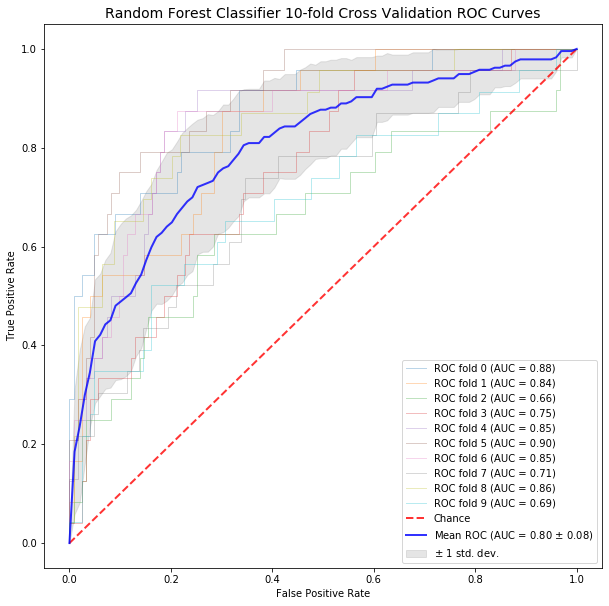

5.8610124588012695


In [462]:
start=time.time()
cv10 = StratifiedKFold(n_splits=10,shuffle=True)
classifier_rf = RandomForestClassifier(bootstrap=True,max_depth=135,max_features='sqrt',min_samples_leaf=2,min_samples_split=3,n_estimators=275,class_weight='balanced')

tprs = []
aucs = []
mean_fpr_rf = np.linspace(0, 1, 100)
originalclass_rf = []
predictedclass_rf = []

fig, ax = plt.subplots(figsize=(10,10))
for i, (train, test) in enumerate(cv10.split(X, y)):
    scaler=StandardScaler()
    X_train_s=scaler.fit_transform(X.loc[train])
    X_test_s=scaler.transform(X.loc[test])
    classifier_rf.fit(X_train_s, y.loc[train])
    viz = plot_roc_curve(classifier_rf, X_test_s, y.loc[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    originalclass_rf.extend(y.loc[test])
    predictedclass_rf.extend(classifier_rf.predict(X_test_s))
    #interpolating 
    interp_tpr = interp(mean_fpr_rf, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr_rf = np.mean(tprs, axis=0)
mean_tpr_rf[-1] = 1.0
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
std_auc_rf = np.std(aucs)
ax.plot(mean_fpr_rf, mean_tpr_rf, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_rf, std_auc_rf),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper_rf = np.minimum(mean_tpr_rf + std_tpr, 1)
tprs_lower_rf = np.maximum(mean_tpr_rf - std_tpr, 0)
ax.fill_between(mean_fpr_rf, tprs_lower_rf, tprs_upper_rf, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Random Forest Classifier 10-fold Cross Validation ROC Curves")
ax.legend(loc="lower right")
plt.show()
end=time.time()
print(end-start)

## Compare both models:

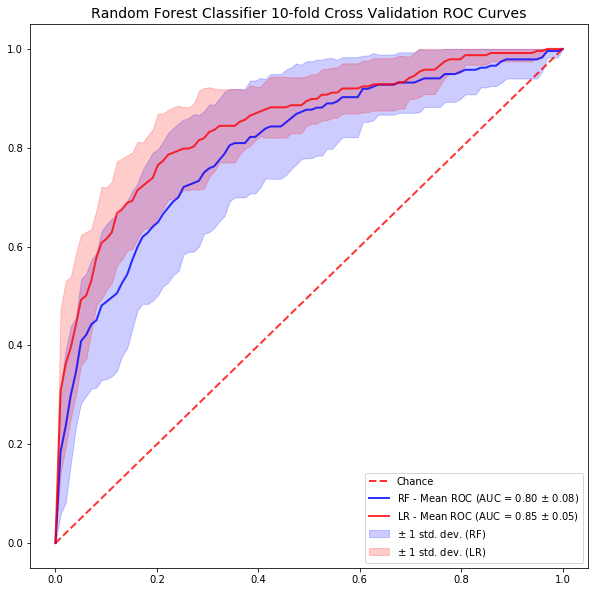

In [463]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
ax.plot(mean_fpr_rf, mean_tpr_rf, color='b',
        label=r'RF - Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_rf, std_auc_rf),
        lw=2, alpha=.8)
ax.fill_between(mean_fpr_rf, tprs_lower_rf, tprs_upper_rf, color='b', alpha=.2,
                label=r'$\pm$ 1 std. dev. (RF)')
ax.plot(mean_fpr, mean_tpr, color='r',
        label=r'LR - Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='r', alpha=.2,
                label=r'$\pm$ 1 std. dev. (LR)')


ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Random Forest Classifier 10-fold Cross Validation ROC Curves")
ax.legend(loc="lower right")
plt.show()

## Confusion Matrix and Classification Report:

Confusion Matrix:
    
Rows - actual classes (0.. no attrition, 1.. attrition)
Cols - predicted classes

[[TN,FP]

[FN,TP]]

In [470]:
print('LR - Confusion Matrix:')
print()
print(confusion_matrix(originalclass,predictedclass))
print()
print('LR - Classification Report:')
print(classification_report(originalclass,predictedclass))
print()
print()
print('RF - Confusion Matrix:')
print()
print(confusion_matrix(originalclass_rf,predictedclass_rf))
print()
print('RF - Classification Report:')
print(classification_report(originalclass_rf,predictedclass_rf))

LR - Confusion Matrix:

[[965 268]
 [ 55 182]]

LR - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1233
           1       0.40      0.77      0.53       237

    accuracy                           0.78      1470
   macro avg       0.68      0.78      0.69      1470
weighted avg       0.86      0.78      0.80      1470



RF - Confusion Matrix:

[[1210   23]
 [ 193   44]]

RF - Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1233
           1       0.66      0.19      0.29       237

    accuracy                           0.85      1470
   macro avg       0.76      0.58      0.60      1470
weighted avg       0.83      0.85      0.82      1470



classification report interpretation depends on the context:

- rather have a little more FP, as long as FNs are very low
  (lower precision, but a high recall)

-> get most employees wanting to quit with the downside of also wrongly predicting some which actually don't want to quit.

- imbalanced data set -> weighted(micro) avg of the metrics (include the imbalance into the metric)

# Wich model is better?

- AUC(LR) higher
- Recall(rf) higher

-> maybe need to work on further details or use other models or combinations of models

# Possible further improvements (Next steps)

- Take a look at the precision-recall function and find models with higher recall, if wanted.
- Use SVM, Gaussian Naive Bayes or other classifiers
- Use a voting classifier (combination of several classifiers in the end)
- Try a simple ANN as a classifier (starting with no hidden layer and see what the output is and maybe try one hidden layer)

But NNs really depend on the data, and thats the main reason for my why I haven't used them, as we already have plenty features and not a very big data set